In [5]:
import os
os.environ['HF_HOME'] = '/run/cache/'

In [1]:
!rm -f minsearch.py
!wget https://raw.githubusercontent.com/alexeygrigorev/minsearch/main/minsearch.py

--2024-11-23 14:56:38--  https://raw.githubusercontent.com/alexeygrigorev/minsearch/main/minsearch.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3832 (3,7K) [text/plain]
Saving to: ‘minsearch.py’

minsearch.py        100%[===================>]   3,74K  --.-KB/s    in 0s      

2024-11-23 14:56:39 (77,7 MB/s) - ‘minsearch.py’ saved [3832/3832]



In [2]:
# import requests 
# import minsearch

# docs_url = 'https://github.com/DataTalksClub/llm-zoomcamp/blob/main/01-intro/documents.json?raw=1'
# docs_response = requests.get(docs_url)
# documents_raw = docs_response.json()

# documents = []

# for course in documents_raw:
#     course_name = course['course']

#     for doc in course['documents']:
#         doc['course'] = course_name
#         documents.append(doc)

# index = minsearch.Index(
#     text_fields=["question", "text", "section"],
#     keyword_fields=["course"]
# )

# index.fit(documents)
import json
import minsearch

# Load the JSON data from the local file
file_path = '/home/tinchung/Documents/GitHub/Mamba-LLM-project/01-intro/luat_giao_duc.json'
with open(file_path, 'r', encoding='utf-8') as file:
    law_data = json.load(file)

# Extract documents from the new JSON structure
documents = []

for chapter in law_data['chapters']:
    chapter_title = chapter['chapter_title']

    for article in chapter['articles']:
        article_data = {
            "law_title": law_data['law_title'],
            "law_number": law_data['law_number'],
            "chapter_title": chapter_title,
            "article_number": article['article_number'],
            "title": article['title'],
            "content": article['content']
        }
        documents.append(article_data)

# Create the index
index = minsearch.Index(
    text_fields=["title", "content"],
    keyword_fields=["law_title", "law_number", "chapter_title", "article_number"]
)

# Fit the index with the documents
index.fit(documents)

In [6]:
documents[-1]

{'law_title': 'Luật Giáo Dục',
 'law_number': '43/2019/QH14',
 'chapter_title': 'Chương IX',
 'article_number': '115',
 'title': 'Quy định chuyển tiếp',
 'content': 'Học sinh, sinh viên sư phạm, người theo học khóa đào tạo nghiệp vụ sư phạm được tuyển sinh trước ngày Luật này có hiệu lực thi hành thì tiếp tục được áp dụng theo quy định tại khoản 3 Điều 89 của Luật Giáo dục số 38/2005/QH11 đã được sửa đổi, bổ sung một số điều theo Luật số 44/2009/QH12, Luật số 74/2014/QH13 và Luật số 97/2015/QH13. Luật này được Quốc hội nước Cộng hòa xã hội chủ nghĩa Việt Nam khóa XIV, kỳ họp thứ 7 thông qua ngày 14 tháng 6 năm 2019. CHỦ TỊCH QUỐC HỘI Nguyễn Thị Kim Ngân '}

In [ ]:
from transformers import MambaConfig, MambaForCausalLM, AutoTokenizer
import torch

model_name = "DeepMount00/mamba_790_hf_qa"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = MambaForCausalLM.from_pretrained(model_name, device_map={"": 0}).eval()

Lỗi no permission khi chạy trên máy, phải vào đúng path 
`conda_env) (base) tinchung@tinchung-1-0:~/Documents/GitHub/Mamba-LLM-project/01-intro$ jupyter notebook`
để không bị lỗi này & phải restart

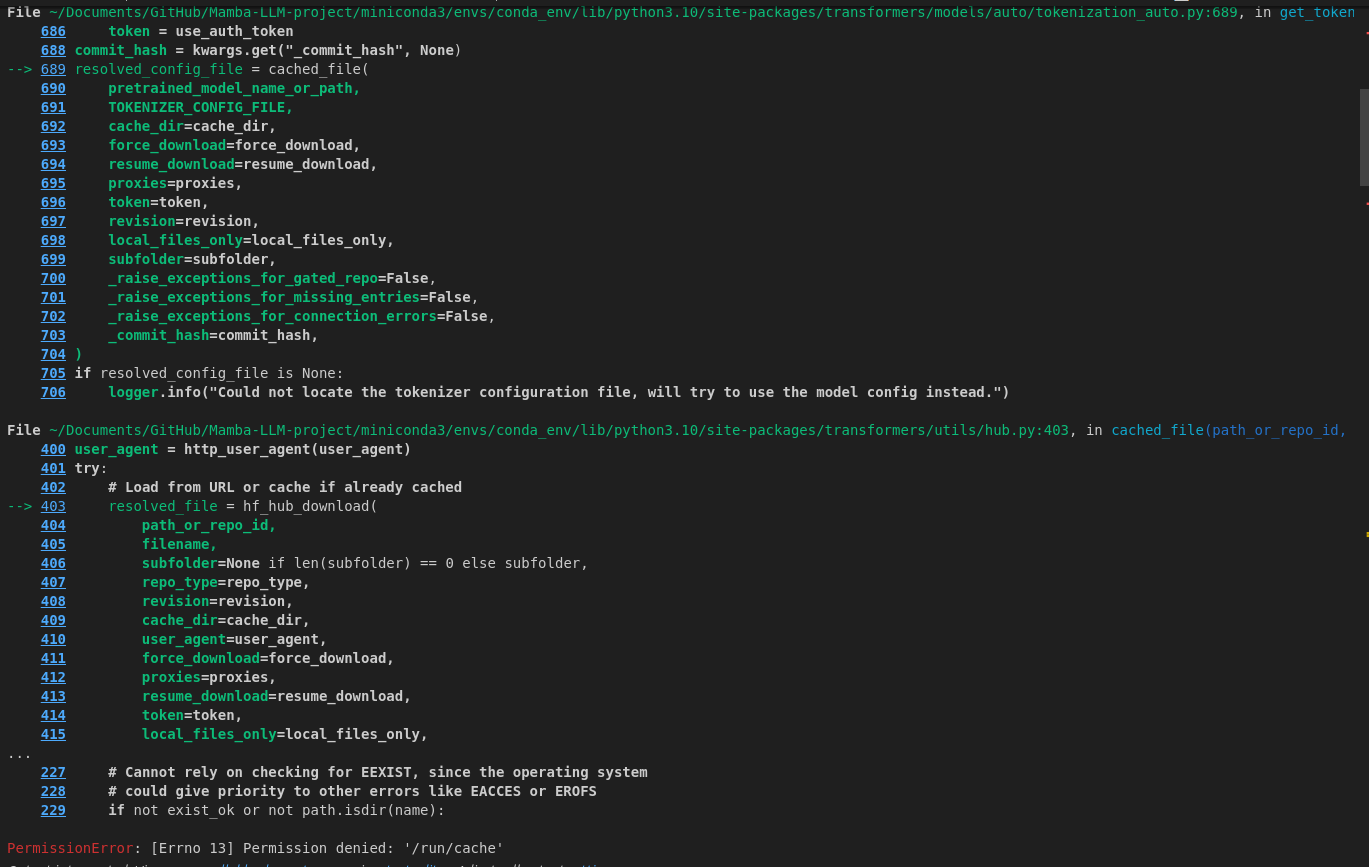

If you're not running in Saturn Cloud, you need to install these libraries:

Make sure you use the latest versions

```
pip install -U transformers accelerate bitsandbytes
```

In [25]:
input_text = "Say something profound about life"


['Say something profound about life.\n\nI’m not sure I’m ready to say that']


In [4]:
def build_prompt(query, search_results):
#     prompt_template = """
# ### RAG Task: Law Searcher Assistant

# **Objective:** Provide a concise answer to the **QUESTION** by leveraging relevant information retrieved from the **CONTEXT** (simulated law database).

# **Input Format:**

# 1. **QUESTION**: 
#     * **Query**: {question}

# 2. **CONTEXT** (Retrieve relevant information from the following):
#     * **Database Snippet**:
#       {context}

# **Response Guidelines:**

# * **Answer**: Respond to the **QUESTION** based **solely** on the information retrieved from the **CONTEXT**.
# * **Format**: Keep your answer **concise** and **directly related** to the query.
# * **No External Knowledge**: Restrict your response to the provided **CONTEXT**; avoid inferences or external legal knowledge.

# **Your Response:**
# [INSERT RESPONSE HERE AFTER RETRIEVING RELEVANT CONTEXT INFORMATION]
# """.strip()
    prompt_template = """
You're a law searcher assistant. Answer the QUESTION based on the CONTEXT from the law database.
Use only the facts from the CONTEXT when answering the QUESTION.

QUESTION: {question}

CONTEXT:
{context}
""".strip()

    context = ""
    
    for doc in search_results:
        context += f"law_title: {doc['law_title']}\nlaw_number: {doc['law_number']}\narticle_number: {doc['article_number']}\ntitle: {doc['title']}\ncontent: {doc['content']}\n\n"

    
    prompt = prompt_template.format(question=query, context=context).strip()
    return prompt



In [34]:
from transformers import MambaConfig, MambaForCausalLM, AutoTokenizer

# Set the maximum token length to 4096
config = MambaConfig(max_length=4096)
model = MambaForCausalLM.from_pretrained("state-spaces/mamba-130m-hf", config=config)

# Generate text with a maximum length of 2048
input_ids = tokenizer("Hey how are you doing?", return_tensors="pt")["input_ids"]
out = model.generate(input_ids, max_new_tokens=2048)
print(tokenizer.batch_decode(out))
		

Some weights of MambaForCausalLM were not initialized from the model checkpoint at state-spaces/mamba-130m-hf and are newly initialized: ['backbone.layers.24.mixer.A_log', 'backbone.layers.24.mixer.D', 'backbone.layers.24.mixer.conv1d.bias', 'backbone.layers.24.mixer.conv1d.weight', 'backbone.layers.24.mixer.dt_proj.bias', 'backbone.layers.24.mixer.dt_proj.weight', 'backbone.layers.24.mixer.in_proj.weight', 'backbone.layers.24.mixer.out_proj.weight', 'backbone.layers.24.mixer.x_proj.weight', 'backbone.layers.24.norm.weight', 'backbone.layers.25.mixer.A_log', 'backbone.layers.25.mixer.D', 'backbone.layers.25.mixer.conv1d.bias', 'backbone.layers.25.mixer.conv1d.weight', 'backbone.layers.25.mixer.dt_proj.bias', 'backbone.layers.25.mixer.dt_proj.weight', 'backbone.layers.25.mixer.in_proj.weight', 'backbone.layers.25.mixer.out_proj.weight', 'backbone.layers.25.mixer.x_proj.weight', 'backbone.layers.25.norm.weight', 'backbone.layers.26.mixer.A_log', 'backbone.layers.26.mixer.D', 'backbone.la

["Hey how are you doing?\n\nI'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're her

In [5]:
from transformers import MambaConfig, MambaForCausalLM, AutoTokenizer

# # Set the maximum token length to 4096
# config = MambaConfig(max_length=4096)
# model = MambaForCausalLM.from_pretrained("state-spaces/mamba-130m-hf", config=config)

def llm(prompt):
    config = MambaConfig(max_length=2100)
    input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"]
    input_length = input_ids.size(1)  # Get the length of the input

    outputs = model.generate(input_ids, max_new_tokens=200)
    result = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    return result

In [6]:
def search(query):
    boost = {'question': 3.0, 'section': 0.5}

    results = index.search(
        query=query,
        # filter_dict={'course': 'data-engineering-zoomcamp'},
        boost_dict=boost,
        num_results=5
    )

    return results

In [7]:
def rag(query):
    search_results = search(query)
    prompt = build_prompt(query, search_results)
    answer = llm(prompt)
    return answer

In [10]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
tmpfs           1,6G  2,7M  1,6G   1% /run
/dev/nvme0n1p3  228G  164G   52G  76% /
tmpfs           7,8G  272M  7,5G   4% /dev/shm
tmpfs           5,0M   12K  5,0M   1% /run/lock
efivarfs        128K   59K   65K  48% /sys/firmware/efi/efivars
/dev/nvme0n1p2  1,1G  6,2M  1,1G   1% /boot/efi
tmpfs           1,6G   14M  1,6G   1% /run/user/1000


In [8]:
rag("Tổ chức kiểm định chất lượng giáo dục")

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


["You're a law searche assistant. Answer the QUESTION based on the CONTEXT from the law database.\nUse only the facts from the CONTEXT when answering the QUESTION.\n\nQUESTION: Tổ chức kiểm định chất lượng giáo dục\n\nCONTEXT:\nlaw_title: Luật Giáo Dục\nlaw_number: 43/2019/QH14\narticle_number: 112\ntitle: Tổ chức kiểm định chất lượng giáo dục\ncontent: 1. Tổ chức kiểm định chất lượng giáo dục bao gồm: a) Tổ chức kiểm định chất lượng giáo dục do Nhà nước thành lập; b) Tổ chức kiểm định chất lượng giáo dục do tổ chức, cá nhân trong nước, nước ngoài thành lập; c) Tổ chức kiểm định chất lượng giáo dục nước ngoài. 2. Việc tổ chức thực hiện kiểm định chất lượng giáo dục được quy định như sau: a) Chính phủ quy định điều kiện, thủ tục thành lập, cho phép hoạt động, đình chỉ, giải thể tổ chức kiểm định chất lượng giáo dục; quy định điều kiện và thủ tục để tổ chức kiểm định chất lượng giáo dục nước ngoài được công nhận hoạt động tại Việt Nam; b) Bộ trưởng Bộ Giáo dục và Đào tạo quyết định thành

In [12]:
input_ids = tokenizer("Hey how are you doing?", return_tensors="pt")["input_ids"]

out = model.generate(input_ids, max_new_tokens=100)
print(tokenizer.batch_decode(out))
# ["Hey how are you doing?\n\nI'm so glad you're here."]

["Hey how are you doing?\n\nI'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm so glad you're here. I'm"]


out put = input + response +dup_response